**Introduction to Machine Learning**

ECE 580, Spring 2022

`HW #2`

**Fakrul Islam Tushar**



## Install/Import Libraries

For running home-work 1 code we will need following python libraries:



1.   numpy , ref: https://pypi.org/project/numpy/
2.   Pandas, ref: https://pypi.org/project/pandas/
3.   Seaborn,ref: https://pypi.org/project/seaborn/
4.   Mathplotlib, ref:https://pypi.org/project/matplotlib/
5.   scikit-learn, ref:https://pypi.org/project/scikit-learn/

In [1]:
# if the libaries aren't istall install and import
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install scikit-learn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from google.colab import files 
#import warnings
#warnings.filterwarnings("ignore")

# Data Preparation (Coppied from HW1)

**Instruction:** Download the Automobile Data Set from the UCI Machine Learning Repository(https://archive.ics.uci.edu/ml/machine-learning-databases/autos/) Although there are several potential uses of this data set, we are going to use this data to predict a car’s price from its characteristics.
For the time being, we are going to restrict ourselves to the **13 continuous predictor variables** (in the order
in which they appear in the data base): **wheel-base, length, width, height, curb-weight, engine-size, bore,
stroke, compression-ratio, horsepower, peak-rpm, city-mpg, and highway-mpg**.

In [2]:
# dataset download link
automobile_dataset_filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'             
# dataset columns header
automobile_dataset_headers  = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors",
                               "body-style","drive-wheels","engine-location","wheel-base", "length","width","height",
                               "curb-weight","engine-type","num-of-cylinders", "engine-size","fuel-system","bore",
                               "stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

#- RAW Automobile dataset
automobile_dataset_df = pd.read_csv(automobile_dataset_filename, names = automobile_dataset_headers)
#--Raw Dataset Statististics
print('-- Raw Dataset details and Statististics --\n')
rows = len(automobile_dataset_df.axes[0]) # Get the number of rows
cols = len(automobile_dataset_df.axes[1]) # Get the number of columns
  
# Print the number of rows and columns
print('Dataset Name      :Automobile Data Set')
print('Source            :https://archive.ics.uci.edu/ml/datasets/Automobile')

print("Number of Rows    :" + str(rows))
print("Number of Columns :" + str(cols))
print('\n')
#automobile_dataset_df.dtype
print("Column Names & types:")
print(automobile_dataset_df.dtypes)


#--Functions


def check_and_print_numof_Nan_from_df(roi_df):
  """ inputs: a) roi_df= dataframe
      output: print the number of NaN/missing values in teh dataset per columns
  """
  #-| Replacing ? with NaN
  roi_df.replace("?", np.nan, inplace = True)
  #-| Converting to a Boolean df True/False
  missing_data_bool_df          = roi_df.isnull()
  missing_data_bool_df_colnames = missing_data_bool_df.columns.values.tolist()

  for column in missing_data_bool_df_colnames:
    print('Column={:17s} | NaN: False={:3d},True={:3d}'.format(column, (~missing_data_bool_df[column]).values.sum(),missing_data_bool_df[column].values.sum()))


  return


print('|-Data preparation and cleaning\n')


#| (1) Raw Automobile dataset
Raw_automobile_dataset_df        = automobile_dataset_df

#| (2) Removed the features of non interest and make a modified automobile dataset (automobile_dataset_13PV_1TV_df)
#  with 3 predictive feature and 1 target feature (price).
automobile_dataset_13PV_1TV_df   = Raw_automobile_dataset_df[["wheel-base", "length","width","height",
                               "curb-weight", "engine-size","bore",
                               "stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]]
print('1. Raw Automobile Datset')
print('Number of Rows={:3d},Columns={:3d}\n'.format(len(Raw_automobile_dataset_df.axes[0]),len(Raw_automobile_dataset_df.axes[1])))

print('2. Removed 12 non of interest predictive variable columns')
print('Modified Datset Number of Rows={:3d},Columns={:3d}'.format(len(automobile_dataset_13PV_1TV_df.axes[0]),len(automobile_dataset_13PV_1TV_df.axes[1])))


#| (3) Identify missing values
print('\n')
print('3. Checking the missing values')
check_and_print_numof_Nan_from_df(automobile_dataset_13PV_1TV_df)

print('\n')
print('4. Remove the Rows with missing values')
#| (4) Removed the Rows having missing values

#-Replacing ? with NaN
automobile_dataset_13PV_1TV_df.replace("?", np.nan, inplace = True)
#-simply drop whole row having any missing value
Clean_automobile_dataset_13PV_1TV_df=automobile_dataset_13PV_1TV_df.dropna() 
#-Reset index, because we have droped few rows
Clean_automobile_dataset_13PV_1TV_df.reset_index(drop=True,inplace=True)
print('Cleand dataset Datset Number of Rows={:3d},Columns={:3d}'.format(len(Clean_automobile_dataset_13PV_1TV_df.axes[0]),len(Clean_automobile_dataset_13PV_1TV_df.axes[1])))
print('-Now cross check if there is any missing values')
check_and_print_numof_Nan_from_df(Clean_automobile_dataset_13PV_1TV_df)

print('.5 Converted all continues data point to dtype float')
Clean_automobile_dataset_13PV_1TV_df = Clean_automobile_dataset_13PV_1TV_df.astype(float)

-- Raw Dataset details and Statististics --

Dataset Name      :Automobile Data Set
Source            :https://archive.ics.uci.edu/ml/datasets/Automobile
Number of Rows    :205
Number of Columns :26


Column Names & types:
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object
|-Data pr

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [3]:
Clean_automobile_dataset_13PV_1TV_df

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
191,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
192,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
193,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [4]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.lib import polynomial
import warnings
warnings.filterwarnings("ignore")

def findthe_best_alpha_for_poly(x,y,alpha_list=[0.1, 1.0, 10.0],degree_of_poly=2):
  poly = PolynomialFeatures(degree=degree_of_poly)
  x_train_poly = poly.fit_transform(x)
  regr_cv = RidgeCV(alphas=alpha_list)
  model_cv = regr_cv.fit(x, y)
  print('Best Model Alpha={}'.format(model_cv.alpha_))
  return model_cv.alpha_


def findthe_best_alpha(x,y,alpha_list=[0.1, 1.0, 10.0]):
  regr_cv = RidgeCV(alphas=alpha_list)
  model_cv = regr_cv.fit(x, y)
  print('Best Model Alpha={}'.format(model_cv.alpha_))
  return model_cv.alpha_

def compute_variance(cv_pred):
  Avg_Model      = cv_pred.mean(axis = 1)
  model_Variance = cv_pred.apply(lambda cv_pred: mean_squared_error(Avg_Model, cv_pred)).mean()
  print('Model Variance={:.2e}'.format(model_Variance))
  return model_Variance

def compute_bias_square(y_true,cv_pred):
  Avg_Model      = cv_pred.mean(axis = 1)
  bias_squared   = mean_squared_error(y_true, Avg_Model)
  #print('Model Bias**2={:.2e}'.format(bias_squared))
  return bias_squared

def compute_bias_squere_and_noideVariance(y_true,cv_pred,cv_info):
  mean_mse      = cv_info['cv_TrainTest_mse'].mean()
  variance      = compute_variance(cv_pred)
  bias_squared  = compute_bias_square(y_true,cv_pred)
  noise_varience = mean_mse  - variance - bias_squared
  print('Model Bias**2 + noise variance={:.2e} +{:.2e}'.format(bias_squared,noise_varience))
  return bias_squared, noise_varience

def lnr_regression(tr_x,tr_y,use_regulizer,alpha):
  lnr_reg            = LinearRegression()
  if use_regulizer==True:
    lnr_reg            = Ridge(alpha=alpha)
  lnr_reg.fit(tr_x,tr_y)
  lnr_reg_intercept  = lnr_reg.intercept_
  lnr_reg_coefficent = lnr_reg.coef_
  return lnr_reg,lnr_reg_intercept,lnr_reg_coefficent

def poly_regression(tr_x,tr_y,degree_of_poly,use_regulizer,alpha):
  poly = PolynomialFeatures(degree=degree_of_poly)
  x_train_poly = poly.fit_transform(tr_x)
  lnr_reg            = LinearRegression()
  if use_regulizer==True:
    lnr_reg            = Ridge(alpha=alpha)
  lnr_reg.fit(x_train_poly, tr_y)
  lnr_reg_intercept  = lnr_reg.intercept_
  lnr_reg_coefficent = lnr_reg.coef_
  return lnr_reg,lnr_reg_intercept,lnr_reg_coefficent

def cv_linear_model(predictive_variable,target_variable,random_state,n_splits,n_repeats,reg_to_use,degree_of_poly=2,use_regulizer=True,alpha=0.01):

  count_i=0
  preds_TrainTest       = pd.DataFrame(index = target_variable.index)
  cv_test_mse           = []
  cv_TrainTest_mse      = []
  cv_intercept_list     = []
  cv_coefficent_list    = []
  cv_R2_test            = []
  cv_R2_TrainTest       = []
  
  rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)
  for train, test in rkf.split(predictive_variable):
    x_train = predictive_variable.iloc[train]
    x_test  = predictive_variable.iloc[test]
    y_train = target_variable.iloc[train]
    y_test  = target_variable.iloc[test]
  
    if reg_to_use == 'lnr_reg':
      lnr_reg,lnr_reg_intercept,lnr_reg_coefficent  = lnr_regression(x_train,y_train,use_regulizer=use_regulizer,alpha=alpha)

      lnr_reg_pred_test  =  lnr_reg.predict(x_test)
      lnr_reg_R2_test    =  lnr_reg.score(x_test, y_test)
      lnr_reg_mse_test   =  mean_squared_error(y_test,lnr_reg_pred_test)

      lnr_reg_pred_TrainTest  =  lnr_reg.predict(predictive_variable)
      lnr_reg_R2_TrainTest    =  lnr_reg.score(predictive_variable, target_variable)
      lnr_reg_mse_TrainTest   =  mean_squared_error(target_variable,lnr_reg_pred_TrainTest)

    if reg_to_use == 'poly_reg':
      lnr_reg,lnr_reg_intercept,lnr_reg_coefficent  = poly_regression(x_train,y_train,degree_of_poly=degree_of_poly,use_regulizer=use_regulizer,alpha=alpha)
      
      poly                     = PolynomialFeatures(degree=degree_of_poly)
      x_test_poly              = poly.fit_transform(x_test)
      predictive_variable_poly = poly.fit_transform(predictive_variable)
      

      lnr_reg_pred_test  =  lnr_reg.predict(x_test_poly)
      lnr_reg_R2_test    =  lnr_reg.score(x_test_poly, y_test)
      lnr_reg_mse_test   =  mean_squared_error(y_test,lnr_reg_pred_test)
      
      lnr_reg_pred_TrainTest  =  lnr_reg.predict(predictive_variable_poly)
      lnr_reg_R2_TrainTest    =  lnr_reg.score(predictive_variable_poly, target_variable)
      lnr_reg_mse_TrainTest   =  mean_squared_error(target_variable,lnr_reg_pred_TrainTest)
    
    count_i +=1
    preds_TrainTest[f'Model_{count_i}'] = lnr_reg_pred_TrainTest

    cv_test_mse.append(lnr_reg_mse_test)
    cv_TrainTest_mse.append(lnr_reg_mse_TrainTest)
    cv_intercept_list.append(lnr_reg_intercept)
    cv_coefficent_list.append(lnr_reg_coefficent)
    cv_R2_test.append(lnr_reg_mse_test)
    cv_R2_TrainTest.append(lnr_reg_mse_TrainTest)

  
  cv_info= pd.DataFrame(list(zip(cv_test_mse,cv_TrainTest_mse,cv_intercept_list,cv_coefficent_list,cv_R2_test,cv_R2_TrainTest)),columns=['cv_test_mse','cv_TrainTest_mse','cv_intercept_list','cv_coefficent_list','cv_R2_test','cv_R2_TrainTest'])

  print('Model:{}, ran for {}-fold Cross-validation with {} Repeats:'.format(reg_to_use,n_splits,n_repeats))
  print('Avg MSE +- Std ={:.2e} +- std {:.2e}'.format(cv_info['cv_TrainTest_mse'].mean(),cv_info['cv_TrainTest_mse'].std()))
  compute_variance(preds_TrainTest)
  #compute_bias_square(target_variable,preds_TrainTest)
  compute_bias_squere_and_noideVariance(target_variable,preds_TrainTest,cv_info)


  import seaborn as sns
  plt.figure(figsize=(6,6))
  sns.kdeplot(data=cv_info, x="cv_TrainTest_mse",shade = True,color = "blue") 
  cv_info['cv_TrainTest_mse'].mean()
  plt.axvline(x=cv_info['cv_TrainTest_mse'].mean(), color='brown', label='mean')
  plt.axvline(x=cv_info['cv_TrainTest_mse'].mean()+cv_info['cv_TrainTest_mse'].std(), color='brown', label='std',ls=':', lw=2)
  plt.axvline(x=cv_info['cv_TrainTest_mse'].mean()-cv_info['cv_TrainTest_mse'].std(), color='brown', ls=':', lw=2)
  plt.ylabel('Density')
  plt.xlabel('MSE')
  plt.legend()
  plt.title('KDE')
  return cv_info,preds_TrainTest

#USAGES:
#cv_info,preds_TrainTest=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['engine-size']],target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],random_state=200,n_splits=10,n_repeats=3,reg_to_use='lnr_reg',degree_of_poly=2,use_regulizer=True,alpha=4500)
#compute_variance(preds_TrainTest)
#compute_bias_square(Clean_automobile_dataset_13PV_1TV_df['price'],preds_TrainTest)

# Cross-Validation

Cross-validation is used for bothmodel selection and hyperparameter selection, to ensure the chosenmodel
and/or hyperparameter(s) are not too highly tuned (“overfit”) to the data. Here, you are going to explore
the impact of cross-validation on your selection of a model that predict a car’s price from its characteristics.

## Q(1) 

Continuing with the 13 continuous predictor variables from the Automobile Data Set from the UCI
Machine Learning Repository that you used in Homework #1 to predict a car’s price from its characteristics,
you are going to further explore the 3 models you proposed in problem 2(a) in Homework #1.

### Q.1(a) 

For your proposedmodel #1, performlinear regression (L2-norm)with 3-10-folds cross-validation
(3 independent repetitions of 10-folds cross-validation) to evaluate the consistency in both the
estimated model and the model performance. For each of the 30 independent regressions, save
the model parameters and the mean-square error (MSE) for the model.



#### Q.1(a)-*i*

Remind us what your proposed model #1 is.
(Write down the equation prˆice = f (features,wˆ ), with the parameters wˆ unspecified.)


**Answer**: 

The Proposed linear model#1: is a simple linear model with only one predictive feature called "engine-size" for the predictor car's price. The equation for this model is 

 $\hat{price}= f(features,\hat{W})$
 
 $\hat{price}= f(engine-size,\hat{W})$


 $\hat{price} = W_0 + W_1\times engine-size$

#### Q.1(a)-*ii*

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold
yields an estimate of MSE; find the kernel density estimate using these 30 samples of MSE.)
What is E{MSE} for this model?

Given the kernel density estimate for MSE, do you believe E{MSE} is a representative summary
statistic (a good approximation) for MSE?

**Answer:**



*   Figure below show the kernal density estimation for the MSE for the model over $10$ fold cross-validation of $3$ repeats ($total= 30  folds$)
*   For this model, $E\{MSE\} = 1.36\times10^{7}$

*   Seeing the Kernal density estimate we can see the $mean/E\{MSE\}$ is much shifted from peak,figure also shown the standard deviation ($\pm  6.11\times10^{4}$). So I think $mean/E\{MSE\}$ is weak estimate for the $MSE$.




Model:lnr_reg, ran for 10-fold Cross-validation with 3 Repeats:
Avg MSE +- Std =1.36e+07 +- std 6.11e+04
Model Variance=4.39e+04
Model Variance=4.39e+04
Model Bias**2 + noise variance=1.35e+07 +1.86e-09


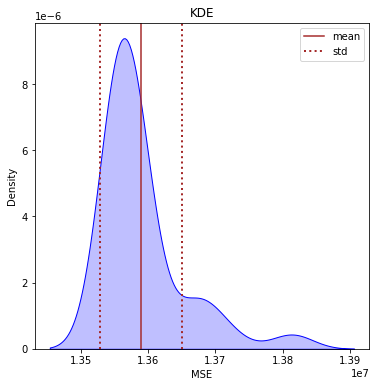

In [5]:
'''
We have made this function *cv_linear_model* 

cv_linear_model()

#- Inputs:
   a)predictive_variable  = predictive variable/variables                                    (dtype: dataframe)
   b)target_variable      = target variable                                                  (dtype: dataframe)
   c)random_state         = defining random state                                            (dtype:int)
   d)n_splits             = Number Cross-validation folds                                    (dtype:int)
   e)n_repeats            = Number Cross-validation repeats                                  (dtype:int)
   f)reg_to_use           = Which Regression to use; 
                           'lnr_reg'= Linear Regression, 'poly_reg'=Polynomical Regression
   g)degree_of_poly       = polynomial degree                                                (dtype:int)
   h)use_regulizer        = Use regularization parameter or not                              (dtype:bool;True/False)
   i)alpha                = Alpha Values                                                     (dtype:float/int)

'''


cv_info_model1,preds_TrainTest_model1=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['engine-size']],
                                                      target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],
                                                      random_state=200,
                                                      n_splits=10,
                                                      n_repeats=3,
                                                      reg_to_use='lnr_reg',
                                                      degree_of_poly=2,
                                                      use_regulizer=False,
                                                      alpha=4500)

#### Q.1(a)-*iii*

Compute the variance for this model. (refer to Eqs. 2.26 and 2.28 in Machine Learning, by
Liu) 2


**Answer:** The variance of this model, $variance=4.39\times10^{4}$


#### Q.1(a)-*iv*

Determine the (bias)2 +noise variance for this model, assuming E{MSE} is a good approximation
for MSE. (Recall: MSE = E{(t −ˆt)2} = variance+(bias)2+noise variance)

**Answer:** Assuming the E{MSE} a good approximation for $MSE$ the given

$(bias)^2+noise\:variance = 1.35\times10^{7} + 1.86\times10^{-9}$

#### Q.1(a)-*v*
What is your impression of the variance of this model versus the (bias)2 +noise variance for
this model? (i.e., does the model appear to have greater consistency and greater systematic
error across data sets, or to have greater variability and less systematic error across data
sets?)


**Answer:** For this model $variance$ is smaller than $(bias)^2+noise\:variance$ that means the estimates are similar to each other where the average model is not close enough to the ground truth. It means the model appear to have greater consistency and greater systematic
error across data sets. In summary it's  low flaxible model.

### Q.1(b)

Repeat the above steps for your proposed model #2.

#### Q.1(b)-i

Remind us what your proposed model #2 is.

**Answer:**

**Proposed Linear model#2 (Multi linear regression)**: The second proposed linear model is a multiple linear model and utilized only two predictive features called "**engine-size**" and '**width**' for the predictor **car's price**.the feature pairs plot generated in question **HW-1#1(d)**, can be seen that "width" has a medium positive relative with both car's "price" and "engine-size." This model exploreD the benefits of having a predictive variable having both strong and medium positively related to the target variable. Additionally, both predictive variables also have a medium positive relation.

The equation for this model is 

 $\hat{price}= f(features,\hat{W})$
 
$\hat{price} = W_0 +W_1\times widtd+ W_2\times engine-size $

#### Q.1(b)-*ii*

Plot a kernel density estimate for the mean square error (MSE) for this model.
What is E{MSE} for this model?
Given the kernel density estimate for MSE, do you believe E{MSE} is a representative summary
statistic (a good approximation) for MSE?

**Answer:**

*   Figure below show the kernal density estimation for the MSE for the model over $10$ fold cross-validation of $3$ repeats ($total= 30  folds$)
*   For this model, $E\{MSE\} = 1.23\times10^{7}$

*   Seeing the Kernal density estimate we can see the $mean/E\{MSE\}$ is much shifted from peak,figure also shown the standard deviation ($\pm  6.40\times10^{4}$). So I think $mean/E\{MSE\}$ is weak estimate for the $MSE$.

Model:lnr_reg, ran for 10-fold Cross-validation with 3 Repeats:
Avg MSE +- Std =1.23e+07 +- std 6.40e+04
Model Variance=5.81e+04
Model Variance=5.81e+04
Model Bias**2 + noise variance=1.22e+07 +-3.73e-09


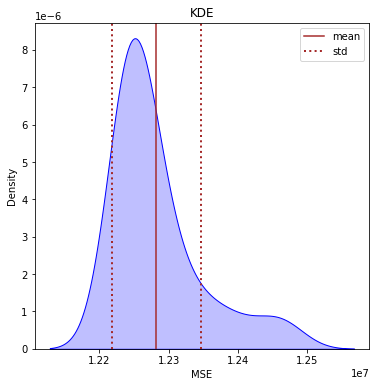

In [6]:
'''
We have made this function *cv_linear_model* 

cv_linear_model()

#- Inputs:
   a)predictive_variable  = predictive variable/variables                                    (dtype: dataframe)
   b)target_variable      = target variable                                                  (dtype: dataframe)
   c)random_state         = defining random state                                            (dtype:int)
   d)n_splits             = Number Cross-validation folds                                    (dtype:int)
   e)n_repeats            = Number Cross-validation repeats                                  (dtype:int)
   f)reg_to_use           = Which Regression to use; 
                           'lnr_reg'= Linear Regression, 'poly_reg'=Polynomical Regression
   g)degree_of_poly       = polynomial degree                                                (dtype:int)
   h)use_regulizer        = Use regularization parameter or not                              (dtype:bool;True/False)
   i)alpha                = Alpha Values                                                     (dtype:float/int)

'''

cv_info_model2,preds_TrainTest_model2=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['width','engine-size']],
                                                      target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],
                                                      random_state=200,
                                                      n_splits=10,
                                                      n_repeats=3,
                                                      reg_to_use='lnr_reg',
                                                      degree_of_poly=2,
                                                      use_regulizer=False,
                                                      alpha=50)

#### Q.1(b)-*iii*

Compute the variance for this model. (refer to Eqs. 2.26 and 2.28 in Machine Learning, by
Liu) 2


**Answer:** The variance of this model, $variance=5.81\times10^{4}$

#### Q.1(b)-*iv*

Determine the (bias)2 +noise variance for this model, assuming E{MSE} is a good approximation
for MSE. (Recall: MSE = E{(t −ˆt)2} = variance+(bias)2+noise variance)

**Answer:** Assuming the E{MSE} a good approximation for $MSE$ the given

$(bias)^2+noise\:variance = 1.22\times10^{7} + 3.73\times10^{-9}$

#### Q.1(b)-*v*
What is your impression of the variance of this model versus the (bias)2 +noise variance for
this model?


**Answer:** For this model $variance$ is small and $(bias)^2+noise\:variance$ is high which means the estimates are similar to each other where the average model is not close enough to the ground truth. It means the model appear to have greater consistency and greater systematic
error across data sets. In summary it's  low flaxible model.

### Q.1(C)
Repeat the above steps for your proposed model #3.

#### Q.1(C)-*i*

Remind us what your proposed model #3 is.

**Answer:** 

**Proposed Linear model#3 (polynomial Regegression):** The third proposed linear model is a plynomial regression of 3rd degree and used the predictive features called "**$highway-mpg$**" to predict the car's price. 

$\hat{price}= f(features,\hat{W})$

$\hat{price} = W_0 +W_1\times highway-mpg+ W_2\times highway-mpg^2 +W_3\times highway-mpg^3 $

#### Q.1(c)-*ii*

Plot a kernel density estimate for the mean square error (MSE) for this model.
What is E{MSE} for this model?
Given the kernel density estimate for MSE, do you believe E{MSE} is a representative summary
statistic (a good approximation) for MSE?

**Answer:**

*   Figure below show the kernal density estimation for the MSE for the model over $10$ fold cross-validation of $3$ repeats ($total= 30  folds$)
*   For this model, $E\{MSE\} = 2.10\times10^{7}$

*   Seeing the Kernal density estimate we can see the $mean/E\{MSE\}$ is much shifted from peak,figure also shown the standard deviation ($\pm  7.34\times10^{4}$). So I think $mean/E\{MSE\}$ is weak estimate for the $MSE$.

Model:poly_reg, ran for 10-fold Cross-validation with 3 Repeats:
Avg MSE +- Std =2.10e+07 +- std 7.34e+04
Model Variance=4.89e+04
Model Variance=4.89e+04
Model Bias**2 + noise variance=2.09e+07 +7.45e-09


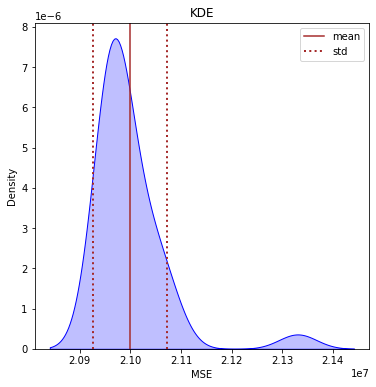

In [7]:
'''
We have made this function *cv_linear_model* 

cv_linear_model()

#- Inputs:
   a)predictive_variable  = predictive variable/variables                                    (dtype: dataframe)
   b)target_variable      = target variable                                                  (dtype: dataframe)
   c)random_state         = defining random state                                            (dtype:int)
   d)n_splits             = Number Cross-validation folds                                    (dtype:int)
   e)n_repeats            = Number Cross-validation repeats                                  (dtype:int)
   f)reg_to_use           = Which Regression to use; 
                           'lnr_reg'= Linear Regression, 'poly_reg'=Polynomical Regression
   g)degree_of_poly       = polynomial degree                                                (dtype:int)
   h)use_regulizer        = Use regularization parameter or not                              (dtype:bool;True/False)
   i)alpha                = Alpha Values                                                     (dtype:float/int)

'''

cv_info_model3,preds_TrainTest__model3=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[["highway-mpg"]],
                                                       target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],
                                                       random_state=200,
                                                       n_splits=10,
                                                       n_repeats=3,
                                                       reg_to_use='poly_reg',
                                                       degree_of_poly=2,
                                                       use_regulizer=False,
                                                       alpha=200)

#### Q.1(c)-*iii*

Compute the variance for this model. (refer to Eqs. 2.26 and 2.28 in Machine Learning, by
Liu) 2


**Answer:** The variance of this model, $variance=4.89\times10^{4}$

#### Q.1(c)-*iv*

Determine the (bias)2 +noise variance for this model, assuming E{MSE} is a good approximation
for MSE. (Recall: MSE = E{(t −ˆt)2} = variance+(bias)2+noise variance)

**Answer:** Assuming the E{MSE} a good approximation for $MSE$ the given

$(bias)^2+noise\:variance = 2.09\times10^{7} + 7.45\times10^{-9}$

#### Q.1(c)-*v*
What is your impression of the variance of this model versus the (bias)2 +noise variance for
this model?


**Answer:** For this model $variance$ is small and $(bias)^2+noise\:variance$ is high which means the estimates are similar to each other where the average model is not close enough to the ground truth. It means the model appear to have greater consistency and greater systematic
error across data sets. In summary it's  low flaxible model.

### Q.1(d)

What is your best guess as to how your 3 models are ordered from least complex (high bias, low
variance) to most complex (low bias, high variance)? Explain how you arrived at your conclusion.
3

**Answer:**

Let's ranked of proposed model based on $(bias)^2+noise\:variance:$
*   $(bias)^2+noise\:variance: model2 < model1 < model3 $

Let's ranked of proposed model based on $variance:$
*   $variance: model1 < model3 < model2 $

According to the ranking I can say among my $three\: models$ the order from least complex to most comple is as follow:

*  $ model3 < model1 < model2 $

$model3$ and $model1$ both having similar low $variance$ compared to $model3$
although $model3$ has much high $bias$ compared to $model2$.


### Q.1(e):
Now that you have used cross-validation to evaluate the consistency of each model and as well
as each model’s performance, which of your three proposed models would you select? Why?
Comment on how your conclusion is different from or similar to the conclusion you came to
without cross-validation in Homework #1.


**Answer:**

Recalling from HW#1: Comparing my three proposed models, I Had select proposed model#2 for precting prices. Higher the $R^2$ (coefficient of determination) better the line fitted to the data. Model#2 multiple linear regression has Best $R^2$ among these three in HW#1

After cross-validation I will still select the model#2. The reason of selecting model#2 it has the lowest $mean\:MSE $ among three model, which means out of these 30 folds model#2 has less error compared to other two models. 

# Regularization

Regularization is also used to ensure the chosen model and/or hyperparameter(s) are not too highly
tuned (“overfit”) to the data by constraining the regression so that themodel parameters do not become
too large. Here, you are going to explore the impact of regularization on your selection of a model
that predict a car’s price from its characteristics.

## Q(2)

Continuing with the 13 continuous predictor variables from the Automobile Data Set from the UCI
Machine Learning Repository that you used in Homework #1 to predict a car’s price from its characteristics,
you are going to continue to explore the 3 models you proposed in problem 2(a) in Homework


### Q.2(a)

For your proposedmodel #1, performlinear regression (L2-norm) with L2-normregularization on
the model weights (Ridge regression) and 3-10-folds cross-validation (3 independent repetitions
of 10-folds cross-validation) to evaluate the consistency in both the estimated model and the
model performance. Choose a weighting for the regularization term that seems reasonable to you.
(You may want to experiment a bit with this value.) For each of the 30 independent regressions,
save the model parameters and the mean-square error (MSE) for the model.

#### Q.2(a)-*i*

Remind us what your proposed model #1 is.
(Write down the equation prˆice = f (features,wˆ ), with the parameters wˆ unspecified.)


**Answer**: 

The Proposed linear model#1: is a simple linear model with only one predictive feature called "engine-size" for the predictor car's price. The equation for this model is 

 $\hat{price}= f(features,\hat{W})$
 
 $\hat{price}= f(engine-size,\hat{W})$


 $\hat{price} = W_0 + W_1\times engine-size$

#### Q.2(a)-*ii*

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold
yields an estimate of MSE; find the kernel density estimate using these 30 samples of MSE.)
What is E{MSE} for this model?

Given the kernel density estimate for MSE, do you believe E{MSE} is a representative summary
statistic (a good approximation) for MSE?

**Answer:**

First we use a run simple cross-validation function to find out the best $alpha$. For model#1 best $alpha=4500$


*   Figure below show the kernal density estimation for the MSE for the model over $10$ fold cross-validation of $3$ repeats ($total= 30  folds$)
*   For this model, $E\{MSE\} = 1.36\times10^{7}$

*   Seeing the Kernal density estimate we can see the $mean/E\{MSE\}$ is much shifted from peak,figure also shown the standard deviation ($\pm  6.11\times10^{4}$). So I think $mean/E\{MSE\}$ is weak estimate for the $MSE$.


In [8]:
#-- Find the Best alpha

findthe_best_alpha(x=Clean_automobile_dataset_13PV_1TV_df[['engine-size']],
                  y=Clean_automobile_dataset_13PV_1TV_df['price'],
                  alpha_list=[0.1, 1.0, 10.0,100,50,200,400,1e1,1e2,4000,4500,5000,1e3,1e4])


Best Model Alpha=4500.0


4500.0

Model:lnr_reg, ran for 10-fold Cross-validation with 3 Repeats:
Avg MSE +- Std =1.36e+07 +- std 5.55e+04
Model Variance=4.28e+04
Model Variance=4.28e+04
Model Bias**2 + noise variance=1.36e+07 +0.00e+00


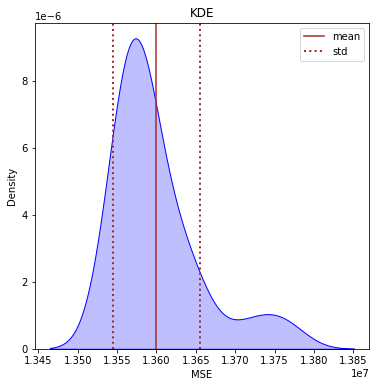

In [9]:
'''
We have made this function *cv_linear_model* 

cv_linear_model()

#- Inputs:
   a)predictive_variable  = predictive variable/variables                                    (dtype: dataframe)
   b)target_variable      = target variable                                                  (dtype: dataframe)
   c)random_state         = defining random state                                            (dtype:int)
   d)n_splits             = Number Cross-validation folds                                    (dtype:int)
   e)n_repeats            = Number Cross-validation repeats                                  (dtype:int)
   f)reg_to_use           = Which Regression to use; 
                           'lnr_reg'= Linear Regression, 'poly_reg'=Polynomical Regression
   g)degree_of_poly       = polynomial degree                                                (dtype:int)
   h)use_regulizer        = Use regularization parameter or not                              (dtype:bool;True/False)
   i)alpha                = Alpha Values                                                     (dtype:float/int)

'''


cv_info_model1_rglz,preds_TrainTest_model1_rglz=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['engine-size']],
                                                      target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],
                                                      random_state=200,
                                                      n_splits=10,
                                                      n_repeats=3,
                                                      reg_to_use='lnr_reg',
                                                      degree_of_poly=2,
                                                      use_regulizer=True,
                                                      alpha=4500)

#### Q.2(a)-*iii*

Compute the variance for this model. (refer to Eqs. 2.26 and 2.28 in Machine Learning, by
Liu) 2


**Answer:** The variance of this model, $variance=4.28\times10^{4}$

#### Q.2(a)-*iv*

Determine the (bias)2 +noise variance for this model, assuming E{MSE} is a good approximation
for MSE. (Recall: MSE = E{(t −ˆt)2} = variance+(bias)2+noise variance)

**Answer:** Assuming the E{MSE} a good approximation for $MSE$ the given

$(bias)^2+noise\:variance = 1.36\times10^{7} + 0$

#### Q.2(a)-*v*
What is your impression of the variance of this model versus the (bias)2 +noise variance for
this model? (i.e., does the model appear to have greater consistency and greater systematic
error across data sets, or to have greater variability and less systematic error across data
sets?)


**Answer:** For this model $variance$ is small and $(bias)^2+noise\:variance$ is high which means the estimates are similar to each other where the average model is not close enough to the ground truth. It means the model appear to have greater consistency and greater systematic
error across data sets. In summary it's  low flaxible model.

### Q.2(b)

Repeat the above steps for your proposed model #2.

#### Q.2(b)-i

Remind us what your proposed model #2 is.

**Answer:**

**Proposed Linear model#2 (Multi linear regression)**: The second proposed linear model is a multiple linear model and utilized only two predictive features called "**engine-size**" and '**width**' for the predictor **car's price**.the feature pairs plot generated in question **HW-1#1(d)**, can be seen that "width" has a medium positive relative with both car's "price" and "engine-size." This model exploreD the benefits of having a predictive variable having both strong and medium positively related to the target variable. Additionally, both predictive variables also have a medium positive relation.

The equation for this model is 

 $\hat{price}= f(features,\hat{W})$
 
$\hat{price} = W_0 +W_1\times widtd+ W_2\times engine-size $

#### Q.2(a)-*ii*

Plot a kernel density estimate for the mean square error (MSE) for this model. (Each fold
yields an estimate of MSE; find the kernel density estimate using these 30 samples of MSE.)
What is E{MSE} for this model?

Given the kernel density estimate for MSE, do you believe E{MSE} is a representative summary
statistic (a good approximation) for MSE?

**Answer:**

First we use a run simple cross-validation function to find out the best $alpha$. For model#1 best $alpha=50$


*   Figure below show the kernal density estimation for the MSE for the model over $10$ fold cross-validation of $3$ repeats ($total= 30  folds$)
*   For this model, $E\{MSE\} = 1.23\times10^{7}$

*   Seeing the Kernal density estimate we can see the $mean/E\{MSE\}$ is much shifted from peak,figure also shown the standard deviation ($\pm  6.44\times10^{4}$). So I think $mean/E\{MSE\}$ is weak estimate for the $MSE$.


In [10]:
#-- Find the Best alpha

findthe_best_alpha(x=Clean_automobile_dataset_13PV_1TV_df[['width','engine-size']],
                  y=Clean_automobile_dataset_13PV_1TV_df['price'],
                  alpha_list=[0.1, 1.0, 10.0,100,50,200,400,1e1,1e2,4000,4500,5000,1e3,1e4])

Best Model Alpha=50.0


50.0

Model:lnr_reg, ran for 10-fold Cross-validation with 3 Repeats:
Avg MSE +- Std =1.23e+07 +- std 6.44e+04
Model Variance=5.41e+04
Model Variance=5.41e+04
Model Bias**2 + noise variance=1.22e+07 +-1.86e-09


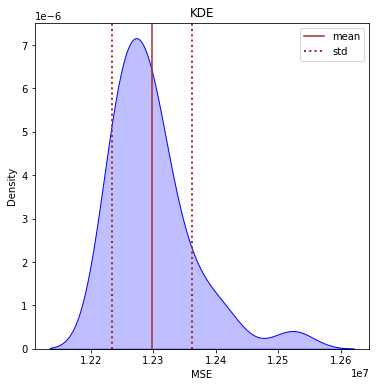

In [11]:
'''
We have made this function *cv_linear_model* 

cv_linear_model()

#- Inputs:
   a)predictive_variable  = predictive variable/variables                                    (dtype: dataframe)
   b)target_variable      = target variable                                                  (dtype: dataframe)
   c)random_state         = defining random state                                            (dtype:int)
   d)n_splits             = Number Cross-validation folds                                    (dtype:int)
   e)n_repeats            = Number Cross-validation repeats                                  (dtype:int)
   f)reg_to_use           = Which Regression to use; 
                           'lnr_reg'= Linear Regression, 'poly_reg'=Polynomical Regression
   g)degree_of_poly       = polynomial degree                                                (dtype:int)
   h)use_regulizer        = Use regularization parameter or not                              (dtype:bool;True/False)
   i)alpha                = Alpha Values                                                     (dtype:float/int)

'''

cv_info_model2_rglz,preds_TrainTest_model2_rglz=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[['width','engine-size']],
                                                      target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],
                                                      random_state=200,
                                                      n_splits=10,
                                                      n_repeats=3,
                                                      reg_to_use='lnr_reg',
                                                      degree_of_poly=2,
                                                      use_regulizer=True,
                                                      alpha=50)

#### Q.2(c)-*iii*

Compute the variance for this model. (refer to Eqs. 2.26 and 2.28 in Machine Learning, by
Liu) 2


**Answer:** The variance of this model, $variance=5.41\times10^{4}$

#### Q.2(b)-*iv*

Determine the (bias)2 +noise variance for this model, assuming E{MSE} is a good approximation
for MSE. (Recall: MSE = E{(t −ˆt)2} = variance+(bias)2+noise variance)

**Answer:** Assuming the E{MSE} a good approximation for $MSE$ the given

$(bias)^2+noise\:variance = 1.22\times10^{7} + 1.86\times10^{-9}$

#### Q.2(b)-*v*
What is your impression of the variance of this model versus the (bias)2 +noise variance for
this model?


**Answer:** For this model $variance$ is small and $(bias)^2+noise\:variance$ is high which means the estimates are similar to each other where the average model is not close enough to the ground truth. It means the model appear to have greater consistency and greater systematic
error across data sets. In summary it's  low flaxible model.

### Q.2(c)

Repeat the above steps for your proposed model #3.

#### Q.2(C)-*i*

Remind us what your proposed model #3 is.

**Answer:** 

**Proposed Linear model#3 (polynomial Regegression):** The third proposed linear model is a plynomial regression of 3rd degree and used the predictive features called "**$highway-mpg$**" to predict the car's price. 

$\hat{price}= f(features,\hat{W})$

$\hat{price} = W_0 +W_1\times highway-mpg+ W_2\times highway-mpg^2 +W_3\times highway-mpg^3 $

#### Q.2(c)-*ii*

Plot a kernel density estimate for the mean square error (MSE) for this model.
What is E{MSE} for this model?
Given the kernel density estimate for MSE, do you believe E{MSE} is a representative summary
statistic (a good approximation) for MSE?

**Answer:**

*   Figure below show the kernal density estimation for the MSE for the model over $10$ fold cross-validation of $3$ repeats ($total= 30  folds$)
*   For this model, $E\{MSE\} = 2.10\times10^{7}$

*   Seeing the Kernal density estimate we can see the $mean/E\{MSE\}$ is much shifted from peak,figure also shown the standard deviation ($\pm  7.34\times10^{4}$). So I think $mean/E\{MSE\}$ is weak estimate for the $MSE$.

In [12]:
findthe_best_alpha_for_poly(x=Clean_automobile_dataset_13PV_1TV_df[["highway-mpg"]],
                            y=Clean_automobile_dataset_13PV_1TV_df['price'],
                            alpha_list=[0.1, 1.0, 10.0,100,50,200,400,1e1,1e2,4000,4500,5000,1e3,1e4,1e7,1e6],
                            degree_of_poly=2)

Best Model Alpha=200.0


200.0

Model:poly_reg, ran for 10-fold Cross-validation with 3 Repeats:
Avg MSE +- Std =2.53e+07 +- std 3.67e+05
Model Variance=4.76e+04
Model Variance=4.76e+04
Model Bias**2 + noise variance=2.53e+07 +3.73e-09


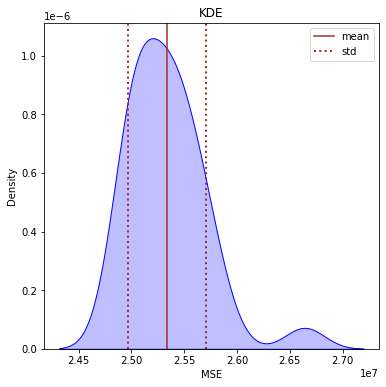

In [13]:
'''
We have made this function *cv_linear_model* 

cv_linear_model()

#- Inputs:
   a)predictive_variable  = predictive variable/variables                                    (dtype: dataframe)
   b)target_variable      = target variable                                                  (dtype: dataframe)
   c)random_state         = defining random state                                            (dtype:int)
   d)n_splits             = Number Cross-validation folds                                    (dtype:int)
   e)n_repeats            = Number Cross-validation repeats                                  (dtype:int)
   f)reg_to_use           = Which Regression to use; 
                           'lnr_reg'= Linear Regression, 'poly_reg'=Polynomical Regression
   g)degree_of_poly       = polynomial degree                                                (dtype:int)
   h)use_regulizer        = Use regularization parameter or not                              (dtype:bool;True/False)
   i)alpha                = Alpha Values                                                     (dtype:float/int)

'''

cv_info_model3,preds_TrainTest__model3=cv_linear_model(predictive_variable=Clean_automobile_dataset_13PV_1TV_df[["highway-mpg"]],
                                                       target_variable=Clean_automobile_dataset_13PV_1TV_df['price'],
                                                       random_state=200,
                                                       n_splits=10,
                                                       n_repeats=3,
                                                       reg_to_use='poly_reg',
                                                       degree_of_poly=2,
                                                       use_regulizer=True,
                                                       alpha=200)

#### Q.2(c)-*iii*

Compute the variance for this model. (refer to Eqs. 2.26 and 2.28 in Machine Learning, by
Liu) 2


**Answer:** The variance of this model, $variance=4.76\times10^{4}$

#### Q.2(c)-*iv*

Determine the (bias)2 +noise variance for this model, assuming E{MSE} is a good approximation
for MSE. (Recall: MSE = E{(t −ˆt)2} = variance+(bias)2+noise variance)

**Answer:** Assuming the E{MSE} a good approximation for $MSE$ the given

$(bias)^2+noise\:variance = 2.53\times10^{7} + 3.73\times10^{-9}$

#### Q.2(c)-*v*
What is your impression of the variance of this model versus the (bias)2 +noise variance for
this model?


**Answer:** For this model $variance$ is small and $(bias)^2+noise\:variance$ is high which means the estimates are similar to each other where the average model is not close enough to the ground truth. It means the model appear to have greater consistency and greater systematic
error across data sets. In summary it's  low flaxible model.

### Q.2(d)

What is your best guess as to how your 3 models are ordered from least complex (high bias, low
variance) to most complex (low bias, high variance)? Explain how you arrived at your conclusion.
Comment on how the results using L2 regularization (Ridge regression) differ from, or are similar
to, the results using no regularization.

Answer:

**Answer:**

Let's ranked of proposed model based on $(bias)^2+noise\:variance:$
*   $(bias)^2+noise\:variance: model2 < model1 < model3 $

Let's ranked of proposed model based on $variance:$
*   $variance: model1 < model3 < model2 $

According to the ranking I can say among my $three\: models$ the order from least complex to most comple is as follow:

*  $ model1 < model3 < model2 $


Althoug the trend is similar with or with regularization. but With regularization we have seen a increased in $(bias)^2+noise\:variance$ for model#1 and model#3, and the inceased in model#3 is much higher than model#2.

also we with regularization we can the $variance$ has decreased for each and every model.

In summary we can say that the regularization is lowering the model flaxibility as variance is decraesing and bias is increasing.



### Q.2(e)

Now that you have used cross-validation to evaluate the consistency of each model as well as
each model’s performance under both L2 regularization (Ridge regression) and no regularization,
which model-regularization combination would you select? Why? (You have three proposed
models and you have considered two regularizations, so there are 6 model-regularization
combinations under consideration.)


**Answer:** First of all if we check the model's performance over $E\{MSE\}$ for all the 6 models we will see the trend of model's performance are almost similar and model#2 cosistantly the lowest.

Now the question is should I select the model#2 with or without regularization ? I will select the model#2 with $L_2$ regularization. The reason of this selection is that, regularozation may not improve the performance of the development dataset, however It can improve the generalization on the test/unseen data. As getting a stable performance on the test set is always our priority so I will select model#2 with $L_2$ regularizations. 



In [14]:
!jupyter nbconvert --to html /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HM2/HM2-Fakrul_Islam_Tushar.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HM2/HM2-Fakrul_Islam_Tushar.ipynb to html
[NbConvertApp] Writing 532095 bytes to /content/drive/MyDrive/Duke-ECE-PHD/ECE-580-Intro_to_ML-Spring22/HM2/HM2-Fakrul_Islam_Tushar.html
